In [1]:
# Dependencies
import json
import requests
import pprint
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Import data as pandas DF's
#Education_2016_df = pd.read_csv("Resources/2016_Education_Postcode.csv")
#Income_2016_df = pd.read_csv("Resources/2016_Income_Postcode.csv")
#VehicleCount_2016_df = pd.read_csv("Resources/2016_VehicleCount_Postcode.csv")
Education_2021_df = pd.read_csv("Resources/2021_Education_Postcode.csv")
Income_2021_df = pd.read_csv("Resources/2021_Income_Postcode.csv")
VehicleCount_2021_df = pd.read_csv("Resources/2021_VehicleCount_Postcode.csv")

#adjust name once year confirmed
FuelType_2021_df = pd.read_csv("Resources/FuelType_Postcode.csv")
#pd.read_csv("Resources/2016_FuelType_Postcode.csv")

In [3]:
def create_scatter(df, y_variable, x_variable):

    x_values = df[x_variable]
    y_values = df[y_variable]
    
    #get plot axis range for annotation location.
    ymin = df[y_variable].min()
    xmin = df[x_variable].min()

    ymax = df[y_variable].max()
    xmax = df[x_variable].max()

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(
        x_values,
        y_values,
        color = 'blue',
        marker = 'o',
        s = 50,
        edgecolors = 'black')

    plt.plot(x_values, regress_values, "r-", linewidth = 1)

    #plt.annotate(line_eq, (xmin + 1, ymin + 5), fontsize =10, color = "red")

    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.suptitle(f"The r-value is: {rvalue}", fontsize = 8, x = 0.2, y = 0.95)
    plt.annotate(line_eq, xy=(0.8, 1.05), fontsize =8, color = "red",
            xycoords='axes fraction', textcoords='axes fraction')

    plt.show()


In [4]:
def reshape_df(df):
    return df.pivot_table(index = ['Vehicle_type', 'Postcode'], 
                          columns = 'Fuel_type', 
                          values = 'Count').reset_index().rename_axis(None, axis=1)

In [5]:
def clean_headers(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df

Clean Data

In [6]:
#Clean Headers
#Education_2016_df = clean_headers(Education_2016_df)
#Income_2016_df = clean_headers(Income_2016_df)
#VehicleCount_2016_df = clean_headers(VehicleCount_2016_df)
Education_2021_df = clean_headers(Education_2021_df)
Income_2021_df = clean_headers(Income_2021_df)
VehicleCount_2021_df = clean_headers(VehicleCount_2021_df)
FuelType_2021_df = clean_headers(FuelType_2021_df)

In [7]:
FuelType_2021_df = reshape_df(FuelType_2021_df)
#FuelType_2016_df = reshape_df(FuelType_2016_df)


In [8]:
FuelType_2021_df = FuelType_2021_df[FuelType_2021_df["Vehicle_type"] != "Total"]
FuelType_2021_df = FuelType_2021_df[FuelType_2021_df["Postcode"] != "Total"]


c:\Users\joshm\anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Merge DFs so that Education, income, vehicle count, fuel type are in 1 df on postcode handle different postcodes that arent present in all datasets

In [9]:
#Combine the 2016 data into a single dataset.
#data_education_income_2016 = pd.merge(Education_2016_df, Income_2016_df, how="inner", on= ["Postcode", "Postcode"])
#data_complete_2016 = pd.merge(data_education_income_2016, VehicleCount_2016_df ,how="inner", on= ["Postcode", "Postcode"])
#data_complete_2016 = data_complete_2016.drop(['State','Total_y', 'Total'], axis=1)

#data_complete_2016.head()

In [10]:
Education_2021_df['Postcode'] = Education_2021_df['Postcode'].astype(int)
data_education_income_2021 = pd.merge(Education_2021_df, Income_2021_df, how="inner", on= ["Postcode", "Postcode"])
data_complete_2021 = pd.merge(data_education_income_2021, VehicleCount_2021_df ,how="inner", on= ["Postcode", "Postcode"])
data_complete_2021 = data_complete_2021.drop(['State','Total_y', 'Total'], axis=1)

Remove data for "Not Stated or Not Applicable" and subtract from Total column

In [11]:
#Education_2016_df["Total"] = Education_2016_df["Total"] - (Education_2016_df["Not_stated"] + Education_2016_df["Not_applicable"])
#Education_2016_df = Education_2016_df.drop(columns=["Not_stated", "Not_applicable"])

Education_2021_df["Total"] = Education_2021_df["Total"] - (Education_2021_df["Not_stated"] + Education_2021_df["Not_applicable"])
Education_2021_df = Education_2021_df.drop(columns=["Not_stated", "Not_applicable"])


In [12]:
#Income_2016_df["Total"] = Income_2016_df["Total"] - (Income_2016_df["Not_stated"] + Income_2016_df["Not_applicable"])
#Income_2016_df = Income_2016_df.drop(columns=["Not_stated", "Not_applicable"])

Income_2021_df["Total"] = Income_2021_df["Total"] - (Income_2021_df["Not_stated"] + Income_2021_df["Not_applicable"])
Income_2021_df = Income_2021_df.drop(columns=["Not_stated", "Not_applicable"])

In [13]:
#Same for people with multiple cars?
Education_2021_df

,Postcode,State,Postgraduate_Degree_Level,Graduate_Diploma_and_Graduate_Certificate_Level,Bachelor_Degree_Level,Advanced_Diploma_and_Diploma_Level,Certificate_III_&_IV_Level,Secondary_Education_-_Years_10_and_above,Certificate_I_&_II_Level,Secondary_Education_-_Years_9_and_below,Supplementary_Codes,Total
0,2000,NSW,3813,489,8530,3814,1137,4761,16,397,872,23818
1,2007,NSW,1134,134,2165,722,347,1426,0,163,202,6285
2,2008,NSW,1731,228,3450,752,404,2265,0,97,147,9073
3,2009,NSW,1872,346,3673,1162,712,2007,12,223,329,10324
4,2010,NSW,4003,796,9068,2185,1402,4145,6,454,602,22655
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,4377,QLD/NSW,9,3,31,35,120,184,0,52,7,441
2637,4380,QLD/NSW,155,90,680,509,1292,2293,10,754,213,5993
2638,4383,QLD/NSW,3,3,15,30,112,179,0,88,12,445
2639,4385,QLD/NSW,6,21,61,67,142,350,0,168,20,839


In [14]:
#Same for vehicle types, probably want to filter out
#FuelType_2021_df = FuelType_2021_df[FuelType_2021_df['Vehicle_type'] == 'Passenger Vehicles']

Create DF's with normalised values (percentage of total)

In [15]:
Education_2021_Normalized = Education_2021_df.copy()
for col in Education_2021_Normalized.columns[2:-1]:
    Education_2021_Normalized[col] = Education_2021_Normalized[col] / Education_2021_Normalized["Total"] * 100
Education_2021_Normalized = Education_2021_Normalized.round(2)


In [16]:
FuelType_2021_Normalized = FuelType_2021_df.copy()
for col in FuelType_2021_Normalized.columns[2:-1]:
    FuelType_2021_Normalized[col] = FuelType_2021_Normalized[col] / FuelType_2021_Normalized["Total"] * 100
FuelType_2021_Normalized = FuelType_2021_Normalized.round(2)

FuelType_2021_Normalized

,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total
0,Light Commercial Vehicles,800,82.85,0.00,0.22,0.0,0.00,16.93,1784
1,Light Commercial Vehicles,801,85.71,0.00,0.00,0.0,0.00,0.00,7
2,Light Commercial Vehicles,802,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Light Commercial Vehicles,803,75.00,0.00,0.00,0.0,0.00,75.00,4
4,Light Commercial Vehicles,804,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
5593,Passenger Vehicles,8012,0.00,0.00,100.00,0.0,0.00,100.00,3
5594,Passenger Vehicles,8051,100.00,0.00,0.00,0.0,0.00,0.00,3
5595,Passenger Vehicles,9000,0.00,0.00,0.00,0.0,0.00,100.00,3
5596,Passenger Vehicles,9726,NaN,NaN,NaN,NaN,NaN,NaN,0


In [17]:
Income_2021_Normalized = Income_2021_df.copy()
for col in Income_2021_Normalized.columns[2:-1]:
    Income_2021_Normalized[col] = Income_2021_Normalized[col] / Income_2021_Normalized["Total"] * 100
Income_2021_Normalized = Income_2021_Normalized.round(2)
Income_2021_Normalized

,Postcode,State,Negative_income,Nil_income,"$1-$149_($1-$7,799)","$150-$299_($7,800-$15,599)","$300-$399_($15,600-$20,799)","$400-$499_($20,800-$25,999)","$500-$649_($26,000-$33,799)","$650-$799_($33,800-$41,599)","$800-$999_($41,600-$51,999)","$1,000-$1,249_($52,000-$64,999)","$1,250-$1,499_($65,000-$77,999)","$1,500-$1,749_($78,000-$90,999)","$1,750-$1,999_($91,000-$103,999)","$2,000-$2,999_($104,000-$155,999)","$3,000-$3,499_($156,000-$181,999)","$3,500_or_more_($182,000_or_more)",Total
0,2000,NSW,0.66,9.80,1.35,2.42,4.32,6.31,8.79,9.13,10.13,9.92,6.45,5.19,4.28,9.59,3.09,8.54,24116
1,2007,NSW,0.86,12.37,1.84,3.79,6.16,7.15,10.63,8.90,8.55,9.97,6.76,4.89,3.96,8.24,2.61,3.46,6360
2,2008,NSW,0.74,15.54,2.82,3.53,5.28,5.23,7.49,7.21,7.35,8.51,7.26,6.09,5.18,10.35,2.66,4.80,9146
3,2009,NSW,0.39,7.51,1.48,2.63,4.04,4.24,5.67,6.23,7.35,9.02,7.75,7.09,6.11,13.84,4.78,11.92,10429
4,2010,NSW,0.33,3.95,1.14,2.24,4.32,4.87,5.09,5.55,6.78,8.54,7.83,7.89,6.64,16.17,5.27,13.41,22730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,4377,QLD/NSW,0.00,4.70,3.80,8.95,13.87,12.30,12.53,8.28,13.65,7.16,4.47,3.36,1.57,1.57,0.00,0.89,447
2637,4380,QLD/NSW,0.87,5.42,4.03,6.92,14.52,13.32,10.68,9.81,9.76,8.51,5.27,3.74,2.16,3.10,0.70,1.14,6124
2638,4383,QLD/NSW,0.00,9.53,3.39,6.99,19.70,17.80,9.53,6.14,7.84,8.05,4.03,1.91,1.48,1.27,0.85,1.27,472
2639,4385,QLD/NSW,2.07,4.83,3.22,8.39,19.31,15.86,9.66,5.17,7.36,8.51,4.60,4.14,1.95,3.33,0.34,1.38,870


In [18]:
#Calculate Education score for postcodes

Group into bigger bins for simplicity of plotting.
Make new dfs with created bins

In [19]:
#Calculate an "Income score" for each 
def calculate_income_score(row):
    values = row[2:-2].values
    weights = [0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    weighted_sum = sum([value * weight for value, weight in zip(values, weights)])
    
    return weighted_sum

Income_2021_Normalized['Income_Score'] = Income_2021_Normalized.apply(calculate_income_score, axis=1)
Income_2021_Normalized

,Postcode,State,Negative_income,Nil_income,"$1-$149_($1-$7,799)","$150-$299_($7,800-$15,599)","$300-$399_($15,600-$20,799)","$400-$499_($20,800-$25,999)","$500-$649_($26,000-$33,799)","$650-$799_($33,800-$41,599)","$800-$999_($41,600-$51,999)","$1,000-$1,249_($52,000-$64,999)","$1,250-$1,499_($65,000-$77,999)","$1,500-$1,749_($78,000-$90,999)","$1,750-$1,999_($91,000-$103,999)","$2,000-$2,999_($104,000-$155,999)","$3,000-$3,499_($156,000-$181,999)","$3,500_or_more_($182,000_or_more)",Total,Income_Score
0,2000,NSW,0.66,9.80,1.35,2.42,4.32,6.31,8.79,9.13,10.13,9.92,6.45,5.19,4.28,9.59,3.09,8.54,24116,605.67
1,2007,NSW,0.86,12.37,1.84,3.79,6.16,7.15,10.63,8.90,8.55,9.97,6.76,4.89,3.96,8.24,2.61,3.46,6360,588.77
2,2008,NSW,0.74,15.54,2.82,3.53,5.28,5.23,7.49,7.21,7.35,8.51,7.26,6.09,5.18,10.35,2.66,4.80,9146,588.88
3,2009,NSW,0.39,7.51,1.48,2.63,4.04,4.24,5.67,6.23,7.35,9.02,7.75,7.09,6.11,13.84,4.78,11.92,10429,661.24
4,2010,NSW,0.33,3.95,1.14,2.24,4.32,4.87,5.09,5.55,6.78,8.54,7.83,7.89,6.64,16.17,5.27,13.41,22730,697.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,4377,QLD/NSW,0.00,4.70,3.80,8.95,13.87,12.30,12.53,8.28,13.65,7.16,4.47,3.36,1.57,1.57,0.00,0.89,447,487.61
2637,4380,QLD/NSW,0.87,5.42,4.03,6.92,14.52,13.32,10.68,9.81,9.76,8.51,5.27,3.74,2.16,3.10,0.70,1.14,6124,518.26
2638,4383,QLD/NSW,0.00,9.53,3.39,6.99,19.70,17.80,9.53,6.14,7.84,8.05,4.03,1.91,1.48,1.27,0.85,1.27,472,449.38
2639,4385,QLD/NSW,2.07,4.83,3.22,8.39,19.31,15.86,9.66,5.17,7.36,8.51,4.60,4.14,1.95,3.33,0.34,1.38,870,488.92


In [20]:
Education_2021_Scored = Education_2021_Normalized
#Apply a multiplier based on education score to new columns
Education_2021_Scored["Postgraduate_Degree_Score"] = Education_2021_Scored["Postgraduate_Degree_Level"].apply(lambda x: x*7)
Education_2021_Scored["Graduate_Diploma_and_Graduate_Certificate_Score"] = Education_2021_Scored["Graduate_Diploma_and_Graduate_Certificate_Level"].apply(lambda x: x*6)
Education_2021_Scored["Bachelor_Degree_Score"] = Education_2021_Scored["Bachelor_Degree_Level"].apply(lambda x: x*5)
Education_2021_Scored["Advanced_Diploma_and_Diploma_Score"] = Education_2021_Scored["Advanced_Diploma_and_Diploma_Level"].apply(lambda x: x*4)
Education_2021_Scored["Certificate_III_&_IV_Level_Score"] = Education_2021_Scored["Certificate_III_&_IV_Level"].apply(lambda x: x*3)
Education_2021_Scored["Certificate_I_&_II_Level_Score"] = Education_2021_Scored["Certificate_I_&_II_Level"].apply(lambda x: x*2)
Education_2021_Scored["Secondary_Education_-_Years_10_and_above_Score"] = Education_2021_Scored["Secondary_Education_-_Years_10_and_above"].apply(lambda x: x*2)
Education_2021_Scored["Secondary_Education_-_Years_9_and_below_Score"] = Education_2021_Scored["Secondary_Education_-_Years_9_and_below"].apply(lambda x: x*1)
#Drop unneeeded columns
Education_2021_Scored = Education_2021_Scored.drop(["Postgraduate_Degree_Level", "Graduate_Diploma_and_Graduate_Certificate_Level", "Bachelor_Degree_Level", "Advanced_Diploma_and_Diploma_Level", "Certificate_III_&_IV_Level", "Certificate_I_&_II_Level", "Secondary_Education_-_Years_10_and_above", "Secondary_Education_-_Years_9_and_below"], axis=1)
#Create a column in df with summed education scores
Education_Score_List = ["Postgraduate_Degree_Score", "Graduate_Diploma_and_Graduate_Certificate_Score", "Bachelor_Degree_Score", "Advanced_Diploma_and_Diploma_Score", "Certificate_III_&_IV_Level_Score", "Certificate_I_&_II_Level_Score", "Secondary_Education_-_Years_10_and_above_Score", "Secondary_Education_-_Years_9_and_below_Score"]
Education_2021_Scored["Education_Score"] = Education_2021_Scored[Education_Score_List].sum(axis=1)


Merge Education and Income tables with fuel types, Then remove suburbs where no fuel types were recorded to disregard NaN values.

In [21]:
Income_Fueltype_2021 = pd.merge(FuelType_2021_Normalized, Income_2021_Normalized, on='Postcode')
#Merge Regional vs Metro here------------------- GJP
Income_Fueltype_2021 = Income_Fueltype_2021[Income_Fueltype_2021['Total_x'] != 0]
Income_Fueltype_2021 = Income_Fueltype_2021[Income_Fueltype_2021['Vehicle_type'] == "Passenger Vehicles"]
Income_Fueltype_2021

,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total_x,State,...,"$800-$999_($41,600-$51,999)","$1,000-$1,249_($52,000-$64,999)","$1,250-$1,499_($65,000-$77,999)","$1,500-$1,749_($78,000-$90,999)","$1,750-$1,999_($91,000-$103,999)","$2,000-$2,999_($104,000-$155,999)","$3,000-$3,499_($156,000-$181,999)","$3,500_or_more_($182,000_or_more)",Total_y,Income_Score
1,Passenger Vehicles,800,19.65,0.06,0.19,0.0,0.0,80.00,5196,NT,...,10.26,14.04,11.29,10.15,6.94,13.48,2.81,4.59,5733,750.97
3,Passenger Vehicles,810,14.54,0.03,0.21,0.0,0.0,85.21,17454,NT,...,8.76,10.85,8.88,8.68,6.64,12.00,2.16,3.37,25161,677.32
5,Passenger Vehicles,812,15.14,0.03,0.32,0.0,0.0,84.57,9077,NT,...,8.38,11.28,8.50,8.34,6.48,10.81,1.79,1.94,13263,655.58
7,Passenger Vehicles,820,20.90,0.08,0.24,0.0,0.0,78.79,14127,NT,...,7.98,11.15,10.30,9.89,7.72,14.27,3.28,5.38,15265,728.47
9,Passenger Vehicles,822,35.89,0.00,0.58,0.0,0.0,63.56,3452,NT,...,3.77,4.28,3.39,3.04,2.31,3.87,0.68,0.88,17093,386.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,Passenger Vehicles,7466,16.67,0.00,0.00,0.0,0.0,100.00,18,TAS,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27,292.59
5273,Passenger Vehicles,7467,13.33,0.00,0.37,0.0,0.0,85.74,1073,TAS,...,6.71,7.60,4.79,4.57,2.80,5.46,0.74,1.55,1356,520.34
5275,Passenger Vehicles,7468,21.50,0.00,0.00,0.0,0.0,79.25,400,TAS,...,5.85,9.16,5.85,9.16,6.63,5.07,1.17,1.17,513,597.12
5277,Passenger Vehicles,7469,19.36,0.00,0.60,0.0,0.0,78.44,501,TAS,...,5.11,6.69,6.34,5.28,5.11,6.69,0.88,1.23,568,548.87


In [22]:
Education_Fueltype_2021 = pd.merge(FuelType_2021_Normalized, Education_2021_Scored, on = "Postcode")
#GJP Merge regional and metro table here too, then filter can filter for metro etc. and adjust scatter plots accordingly
Education_Fueltype_2021 = Education_Fueltype_2021[Education_Fueltype_2021['Total_x'] != 0]

#Select only Passenger Vehicles
Education_Fueltype_2021 = Education_Fueltype_2021[Education_Fueltype_2021['Vehicle_type'] == "Passenger Vehicles"]
Education_Fueltype_2021


,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total_x,State,...,Total_y,Postgraduate_Degree_Score,Graduate_Diploma_and_Graduate_Certificate_Score,Bachelor_Degree_Score,Advanced_Diploma_and_Diploma_Score,Certificate_III_&_IV_Level_Score,Certificate_I_&_II_Level_Score,Secondary_Education_-_Years_10_and_above_Score,Secondary_Education_-_Years_9_and_below_Score,Education_Score
1,Passenger Vehicles,800,19.65,0.06,0.19,0.0,0.0,80.00,5196,NT,...,5645,109.34,19.86,146.15,47.12,38.04,0.00,45.20,2.30,408.01
3,Passenger Vehicles,810,14.54,0.03,0.21,0.0,0.0,85.21,17454,NT,...,24800,86.31,23.64,115.35,36.48,45.42,0.24,54.12,6.04,367.60
5,Passenger Vehicles,812,15.14,0.03,0.32,0.0,0.0,84.57,9077,NT,...,12992,37.38,17.34,78.65,37.76,58.74,0.36,71.22,7.58,309.03
7,Passenger Vehicles,820,20.90,0.08,0.24,0.0,0.0,78.79,14127,NT,...,15089,79.31,24.72,127.80,42.56,48.00,0.24,50.46,4.13,377.22
9,Passenger Vehicles,822,35.89,0.00,0.58,0.0,0.0,63.56,3452,NT,...,16634,10.29,5.94,24.45,15.36,34.89,0.86,106.58,19.30,217.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,Passenger Vehicles,7466,16.67,0.00,0.00,0.0,0.0,100.00,18,TAS,...,24,0.00,0.00,0.00,0.00,37.50,0.00,91.66,16.67,145.83
5273,Passenger Vehicles,7467,13.33,0.00,0.37,0.0,0.0,85.74,1073,TAS,...,1307,16.10,5.94,39.80,21.72,74.37,0.00,91.04,10.41,259.38
5275,Passenger Vehicles,7468,21.50,0.00,0.00,0.0,0.0,79.25,400,TAS,...,501,25.13,10.80,44.90,34.32,85.02,0.00,71.06,9.38,280.61
5277,Passenger Vehicles,7469,19.36,0.00,0.60,0.0,0.0,78.44,501,TAS,...,559,10.01,0.00,34.90,27.20,85.86,0.00,72.62,17.89,248.48


In [23]:
# read in and add electoraterating values for each postcode. Remove duplicates and keep the first non-null value for electoraterating
# Outer Metro, Inner Metro and provincial are grouped for this purpose as "Metro", and Rural is left as Rural. Null values will be dropped for the purpose of plotting.

Metro_Rural_Postcode = pd.read_csv('Resources/ElectorateRating_Postcode.csv')
Metro_Rural_Postcode = Metro_Rural_Postcode.drop_duplicates().groupby('Postcode', as_index=False).first()
Metro_Rural_Postcode

,Postcode,Metro_Rural
0,200,NaN
1,800,Metro
2,801,Rural
3,803,NaN
4,804,NaN
...,...,...
3168,9013,NaN
3169,9015,NaN
3170,9464,NaN
3171,9726,NaN


In [24]:
#Merge Metro/Rural values with Income and Education dfs
Education_Fueltype_2021 = pd.merge(Education_Fueltype_2021, Metro_Rural_Postcode, on = "Postcode")
Income_Fueltype_2021 = pd.merge(Income_Fueltype_2021, Metro_Rural_Postcode, on='Postcode')
Education_Fueltype_2021

,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total_x,State,...,Postgraduate_Degree_Score,Graduate_Diploma_and_Graduate_Certificate_Score,Bachelor_Degree_Score,Advanced_Diploma_and_Diploma_Score,Certificate_III_&_IV_Level_Score,Certificate_I_&_II_Level_Score,Secondary_Education_-_Years_10_and_above_Score,Secondary_Education_-_Years_9_and_below_Score,Education_Score,Metro_Rural
0,Passenger Vehicles,800,19.65,0.06,0.19,0.0,0.0,80.00,5196,NT,...,109.34,19.86,146.15,47.12,38.04,0.00,45.20,2.30,408.01,Metro
1,Passenger Vehicles,810,14.54,0.03,0.21,0.0,0.0,85.21,17454,NT,...,86.31,23.64,115.35,36.48,45.42,0.24,54.12,6.04,367.60,Metro
2,Passenger Vehicles,812,15.14,0.03,0.32,0.0,0.0,84.57,9077,NT,...,37.38,17.34,78.65,37.76,58.74,0.36,71.22,7.58,309.03,Metro
3,Passenger Vehicles,820,20.90,0.08,0.24,0.0,0.0,78.79,14127,NT,...,79.31,24.72,127.80,42.56,48.00,0.24,50.46,4.13,377.22,Metro
4,Passenger Vehicles,822,35.89,0.00,0.58,0.0,0.0,63.56,3452,NT,...,10.29,5.94,24.45,15.36,34.89,0.86,106.58,19.30,217.67,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,Passenger Vehicles,7466,16.67,0.00,0.00,0.0,0.0,100.00,18,TAS,...,0.00,0.00,0.00,0.00,37.50,0.00,91.66,16.67,145.83,Rural
2629,Passenger Vehicles,7467,13.33,0.00,0.37,0.0,0.0,85.74,1073,TAS,...,16.10,5.94,39.80,21.72,74.37,0.00,91.04,10.41,259.38,Rural
2630,Passenger Vehicles,7468,21.50,0.00,0.00,0.0,0.0,79.25,400,TAS,...,25.13,10.80,44.90,34.32,85.02,0.00,71.06,9.38,280.61,Rural
2631,Passenger Vehicles,7469,19.36,0.00,0.60,0.0,0.0,78.44,501,TAS,...,10.01,0.00,34.90,27.20,85.86,0.00,72.62,17.89,248.48,Rural


In [25]:
#Drop Rows where Metro_Rural is NaN
Education_Fueltype_2021.dropna(subset=["Metro_Rural"], inplace=True)
Income_Fueltype_2021.dropna(subset=["Metro_Rural"], inplace=True)

In [26]:
Income_Fueltype_2021.sort_values("Electric", ascending = False)

,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total_x,State,...,"$1,000-$1,249_($52,000-$64,999)","$1,250-$1,499_($65,000-$77,999)","$1,500-$1,749_($78,000-$90,999)","$1,750-$1,999_($91,000-$103,999)","$2,000-$2,999_($104,000-$155,999)","$3,000-$3,499_($156,000-$181,999)","$3,500_or_more_($182,000_or_more)",Total_y,Income_Score,Metro_Rural
691,Passenger Vehicles,3026,14.38,10.12,1.53,0.0,0.00,73.88,4652,VIC,...,11.33,9.14,7.05,5.23,6.95,1.35,1.15,5930,593.40,Metro
2411,Passenger Vehicles,6462,25.81,9.68,0.00,0.0,0.00,70.97,31,WA,...,6.36,4.55,10.00,4.55,10.91,0.00,2.73,110,612.79,Rural
268,Passenger Vehicles,2308,8.28,3.82,0.00,0.0,1.91,85.35,157,NSW,...,0.94,0.00,0.00,0.00,0.00,0.00,0.31,957,251.73,Rural
473,Passenger Vehicles,2609,15.95,3.35,0.26,0.0,17.13,63.16,4927,ACT,...,15.23,9.30,6.06,3.50,4.99,1.21,1.89,742,610.96,Metro
879,Passenger Vehicles,3237,28.14,1.80,5.99,0.0,0.00,69.46,167,VIC,...,11.82,3.94,6.40,3.94,0.00,0.00,1.97,203,502.86,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,Passenger Vehicles,3791,16.01,0.00,1.81,0.0,0.00,81.97,993,VIC,...,8.25,7.14,6.19,5.16,9.63,2.49,3.18,1163,598.65,Rural
1228,Passenger Vehicles,3788,19.07,0.00,3.30,0.0,0.00,78.10,1274,VIC,...,9.83,6.33,7.79,4.51,10.04,2.40,4.22,1374,626.10,Rural
1227,Passenger Vehicles,3787,18.51,0.00,2.38,0.0,0.00,79.10,713,VIC,...,9.68,7.01,8.03,5.48,9.55,1.66,5.35,785,601.11,Rural
1226,Passenger Vehicles,3786,17.46,0.00,1.15,0.0,0.00,81.11,1048,VIC,...,9.06,5.74,5.82,5.65,10.22,4.07,5.57,1203,610.95,Rural


Create Plots

All values Scatter

In [27]:
Income_Metro = Income_Fueltype_2021[Income_Fueltype_2021['Metro_Rural'] == 'Metro']
Education_Metro = Education_Fueltype_2021[Education_Fueltype_2021['Metro_Rural'] == 'Metro']
Income_Rural= Income_Fueltype_2021[Income_Fueltype_2021['Metro_Rural'] == 'Rural']
Education_Rural = Education_Fueltype_2021[Education_Fueltype_2021['Metro_Rural'] == 'Rural']

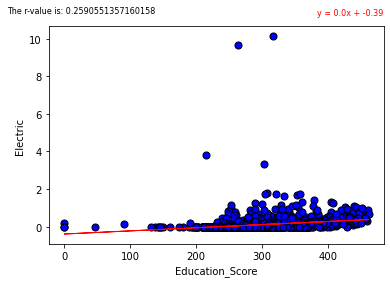

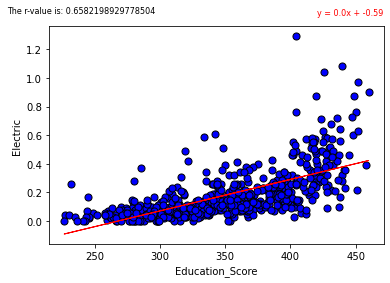

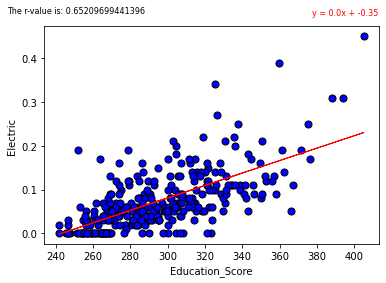

In [28]:
create_scatter(Education_Fueltype_2021, "Electric", "Education_Score")

#create_scatter(Education_Metro.query("Total_x > 1000"), "Electric", "Education_Score")
create_scatter(Education_Metro.query("Total_x > 5000"), "Electric", "Education_Score")
#create_scatter(Education_Rural.query("Total_x > 1000"), "Electric", "Education_Score")
create_scatter(Education_Rural.query("Total_x > 5000"), "Electric", "Education_Score")

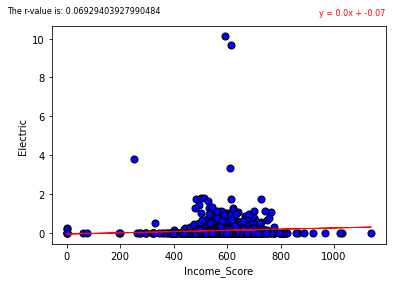

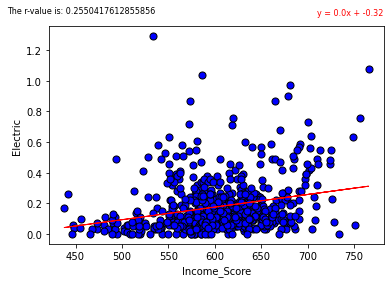

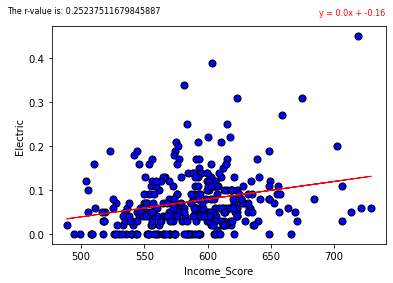

In [29]:
create_scatter(Income_Fueltype_2021, "Electric", "Income_Score")

#create_scatter(Income_Metro.query("Total_x > 1000"), "Electric", "Income_Score")
create_scatter(Income_Metro.query("Total_x > 5000"), "Electric", "Income_Score")
#create_scatter(Income_Rural.query("Total_x > 1000"), "Electric", "Income_Score")
create_scatter(Income_Rural.query("Total_x > 5000"), "Electric", "Income_Score")

In [32]:
Income_Metro.sort_values("Income_Score", ascending = False).head(3)

,Vehicle_type,Postcode,Diesel,Electric,LPG/Dual fuel,Not Applicable,Other and unknown,Petrol,Total_x,State,...,"$1,000-$1,249_($52,000-$64,999)","$1,250-$1,499_($65,000-$77,999)","$1,500-$1,749_($78,000-$90,999)","$1,750-$1,999_($91,000-$103,999)","$2,000-$2,999_($104,000-$155,999)","$3,000-$3,499_($156,000-$181,999)","$3,500_or_more_($182,000_or_more)",Total_y,Income_Score,Metro_Rural
1879,Passenger Vehicles,5111,10.16,0.00,0.00,0.0,0.00,88.20,305,SA,...,25.49,39.50,9.80,4.48,1.96,0.00,0.00,357,858.81,Metro
6,Passenger Vehicles,829,25.25,0.00,0.42,0.0,0.00,74.47,713,NT,...,21.51,28.63,13.13,6.28,4.89,1.54,1.68,716,820.99,Metro
68,Passenger Vehicles,2043,7.43,0.29,0.14,0.0,1.69,90.40,3499,NSW,...,7.45,8.46,10.15,9.01,21.80,6.18,11.21,8237,777.00,Metro
